In [13]:
#Import Tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [18]:
#### downlad and read the dataset
df = pd.read_csv('Daegu_Real_Estate_data.csv')

#### cleaning the dataset
df = df.drop(["YrSold","HallwayType","HeatingType","N_Parkinglot(Ground)",'AptManageType',"N_Parkinglot(Basement)","N_APT","N_manager","N_elevators", "N_FacilitiesInApt", "N_FacilitiesNearBy(Total)","N_FacilitiesNearBy(Mall)","N_FacilitiesNearBy(ETC)","N_FacilitiesNearBy(Park)",'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)','N_FacilitiesNearBy(Dpartmentstore)','N_SchoolNearBy(Elementary)','N_SchoolNearBy(Middle)','N_SchoolNearBy(High)','N_SchoolNearBy(University)' ], axis = 1)
df2=df.drop(['TimeToBusStop', 'TimeToSubway',"SubwayStation"], axis = 1  )

#### rename the columns
df.columns = ['price','YearBuilt','MonthSold','sqft','floor','TimeToBusStop',
              'TimeToSubway','SubwayStation','total_school']
df2.columns = ['price','YearBuilt','MonthSold','sqft','floor','total_school']

#### Extra columns
df['sqft_price']= df['price']/df['sqft'] 

#### Remove the rows which have missing data
df.dropna()

#### Check with Null data
df.info



<bound method DataFrame.info of        price  YearBuilt  MonthSold  sqft  floor TimeToBusStop TimeToSubway  \
0     141592       2006          8   814      3    5min~10min  10min~15min   
1      51327       1985          8   587      8        0~5min   5min~10min   
2      48672       1985          8   587      6        0~5min   5min~10min   
3     380530       2006          8  2056      8        0~5min       0-5min   
4     221238       1993          8  1761      3        0~5min  15min~20min   
5      35840       1992          8   355      5    5min~10min  10min~15min   
6      78318       1992          8   644      2    5min~10min  15min~20min   
7      61946       1993          8   644     10        0~5min  15min~20min   
8      84070       1993          8   644      3        0~5min  15min~20min   
9      83185       1992          8   644     13    5min~10min  15min~20min   
10    168141       1986          8  1377      4        0~5min  10min~15min   
11    153982       1986         

In [15]:
df.head()

,price,YearBuilt,MonthSold,sqft,floor,TimeToBusStop,TimeToSubway,SubwayStation,total_school,sqft_price
0,141592,2006,8,814,3,5min~10min,10min~15min,Kyungbuk_uni_hospital,9.0,173.945946
1,51327,1985,8,587,8,0~5min,5min~10min,Daegu,4.0,87.439523
2,48672,1985,8,587,6,0~5min,5min~10min,Daegu,4.0,82.916525
3,380530,2006,8,2056,8,0~5min,0-5min,Sin-nam,7.0,185.082685
4,221238,1993,8,1761,3,0~5min,15min~20min,Myung-duk,17.0,125.632027


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


According to the first plot, the most of the prices per sqft are sidtribute between 180 to 270


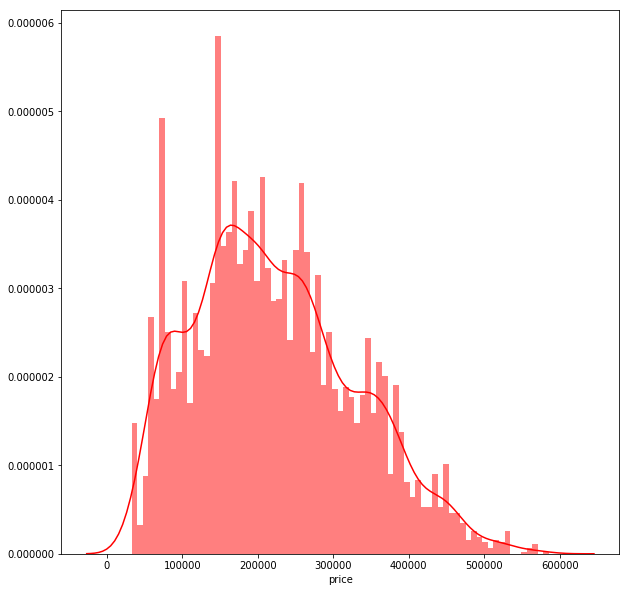

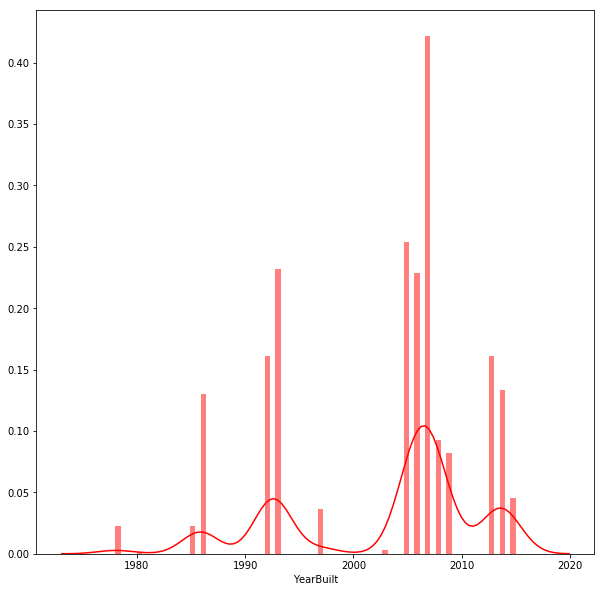

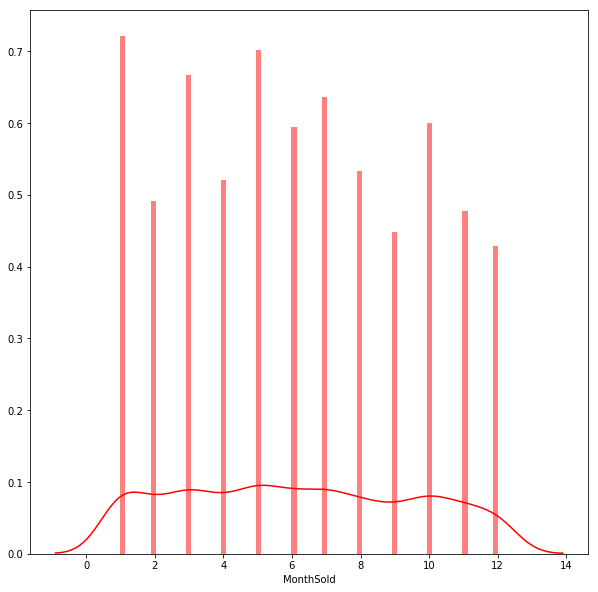

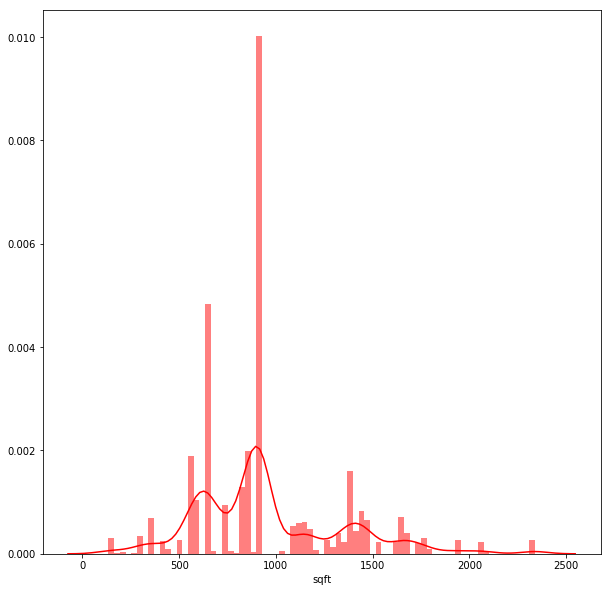

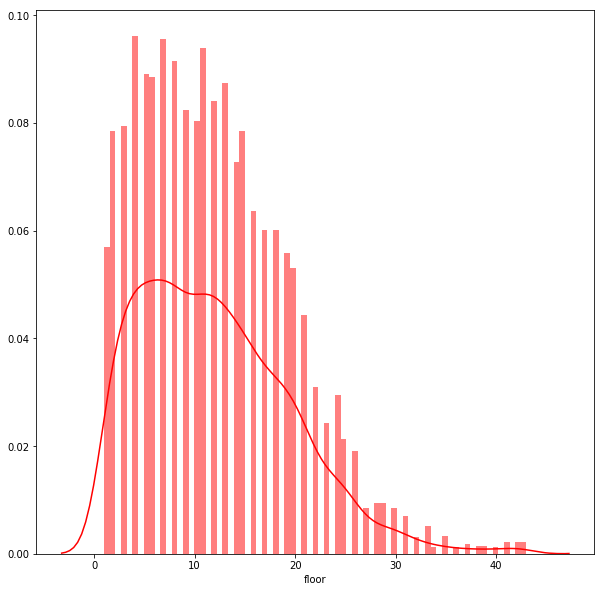

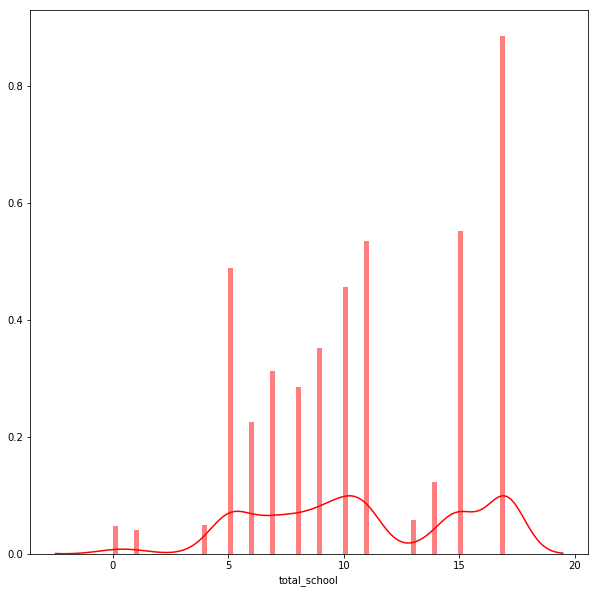

In [17]:
#By using this function, I can obtain the distribution of any variable of the dataset
def SqftPriceDist2(df2):
    for col in df2:
            plt.figure(figsize=(10, 10))
            sns.distplot(df[col], color='red', bins=75, hist_kws={'alpha': 0.5});
SqftPriceDist2(df2)

print('According to the first plot, the most of the prices per sqft are sidtribute between 180 to 270')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The data present that how far the bas stop is does not effect the price per sqft
However, the distance of subway may affect the price per sqft. The prices per sqft which distance 0 to 15 minutes from the subway are higher than the prices per sqft which distance is above 15 minutes from the subway  


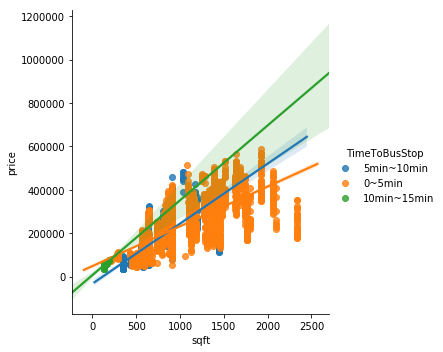

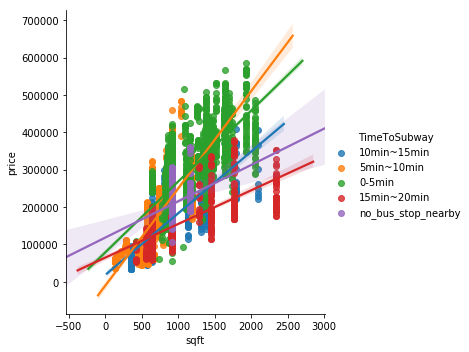

In [62]:
#By using this function, I can find out the trend base on different consitions.
def Price_Subway(df):
    print(sns.lmplot(x="sqft", y="price", hue="TimeToBusStop", data=df))
    print(sns.lmplot(x="sqft", y="price", hue="TimeToSubway", data=df))
    
    
Price_Subway(df) 

print('The data present that how far the bas stop is does not effect the price per sqft')
print('However, the distance of subway may affect the price per sqft. The prices per sqft which distance 0 to 15 minutes from the subway are higher than the prices per sqft which distance is above 15 minutes from the subway  ')

In [63]:
#By using this function, I can also obtain the mean by each group 
def descr_data(df):
    print(df.groupby('total_school')['sqft_price'].mean().reset_index())
    
descr_data(df)
print('The data present that price per sqft did not increase when the number of nearby school increase')

    total_school  sqft_price
0            0.0  386.867263
1            1.0  388.458095
2            4.0  132.306088
3            5.0  271.374211
4            6.0  172.119364
5            7.0  211.735111
6            8.0  239.574604
7            9.0  262.407926
8           10.0  277.117149
9           11.0  263.220138
10          13.0  145.781164
11          14.0  165.384384
12          15.0  217.657677
13          17.0  201.219486
The data present that price per sqft did not increase when the number of nearby school increase
